Librerías importadas correctamente
Mounted at /content/drive
Dataset cargado correctamente
Dataset cargado y columnas renombradas
Valores nulos por columna:
Largo Sépalo    0
Ancho Sépalo    0
Largo Pétalo    0
Ancho Pétalo    0
Especie         0
dtype: int64
Cantidad de duplicados: 3


<ipython-input-1-d9449422758a>:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Especie")


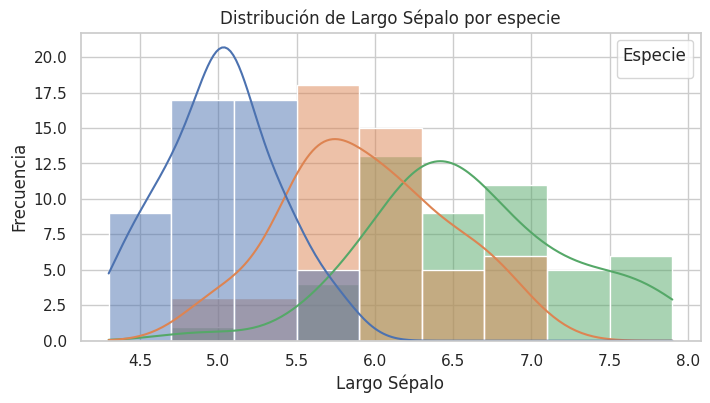

<ipython-input-1-d9449422758a>:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Especie")


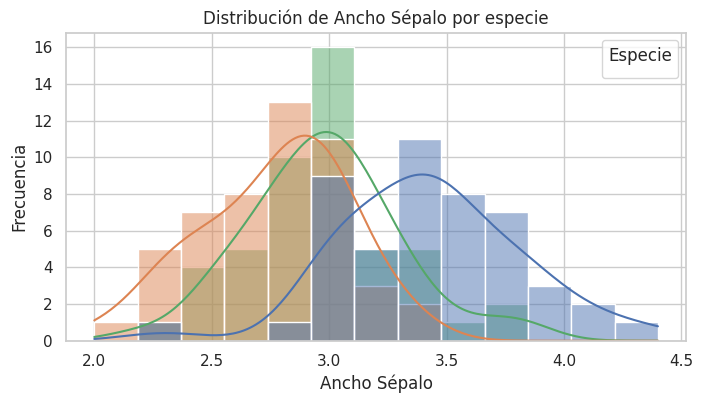

<ipython-input-1-d9449422758a>:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Especie")


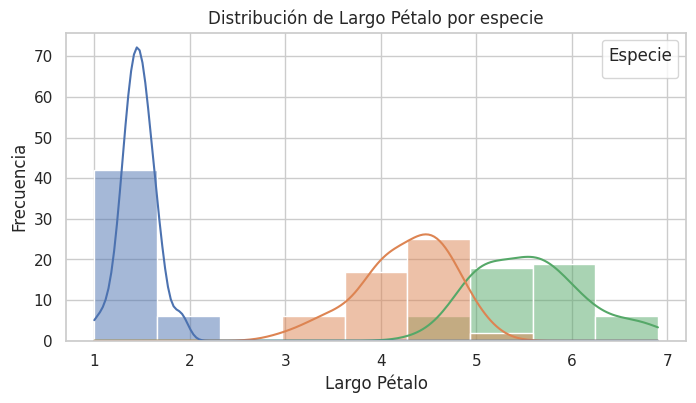

<ipython-input-1-d9449422758a>:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Especie")


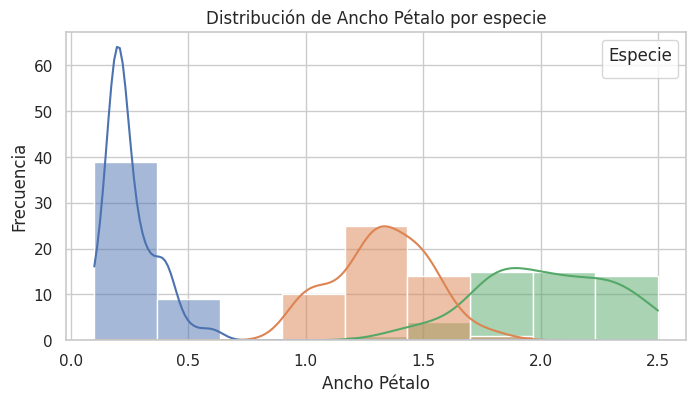

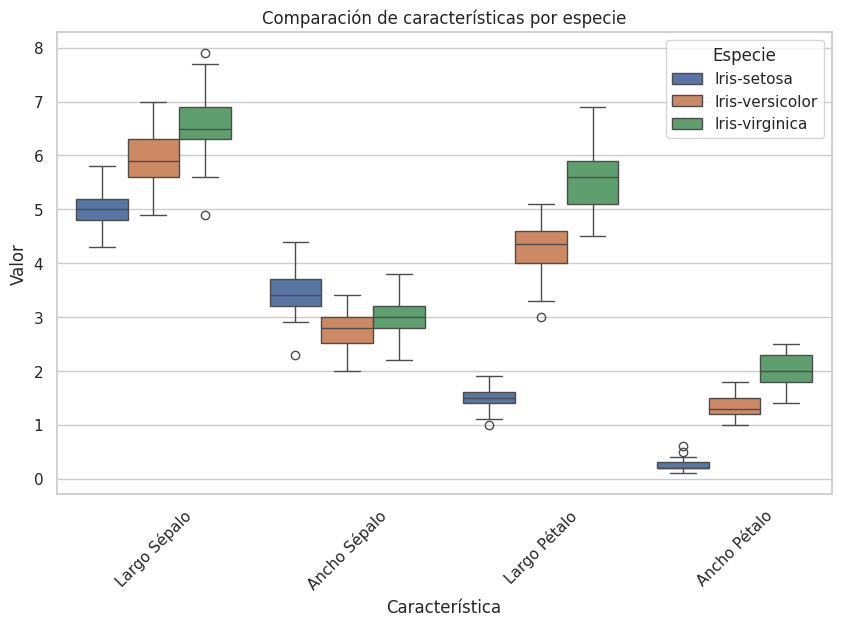

<Figure size 640x480 with 0 Axes>

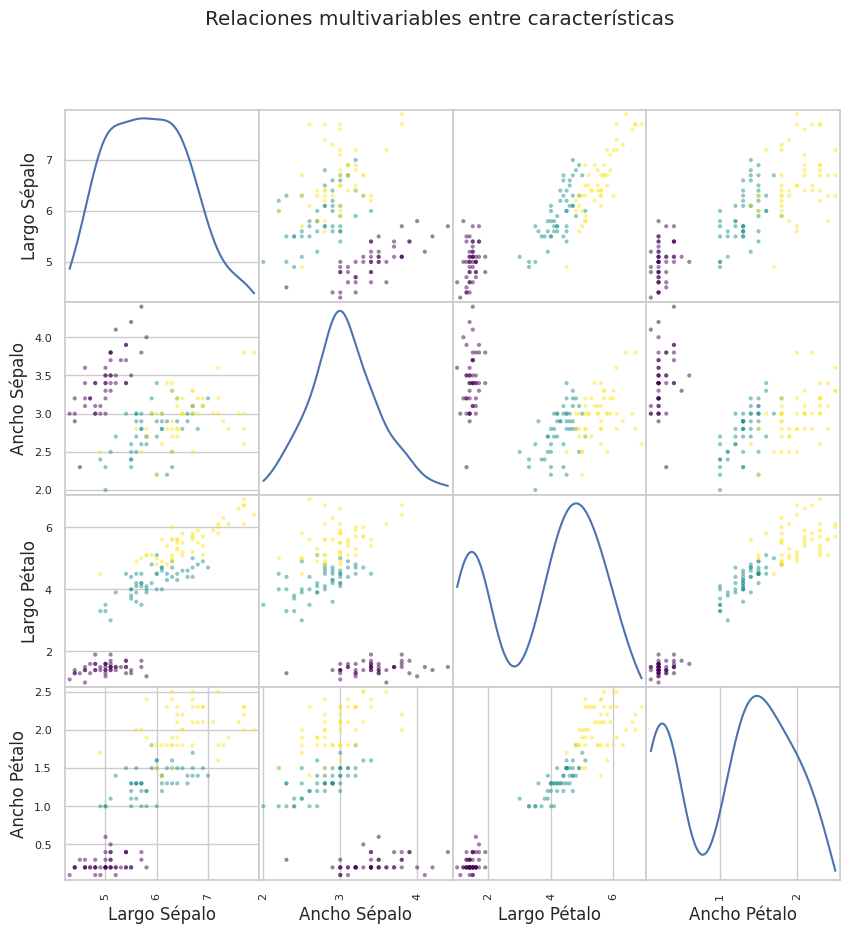

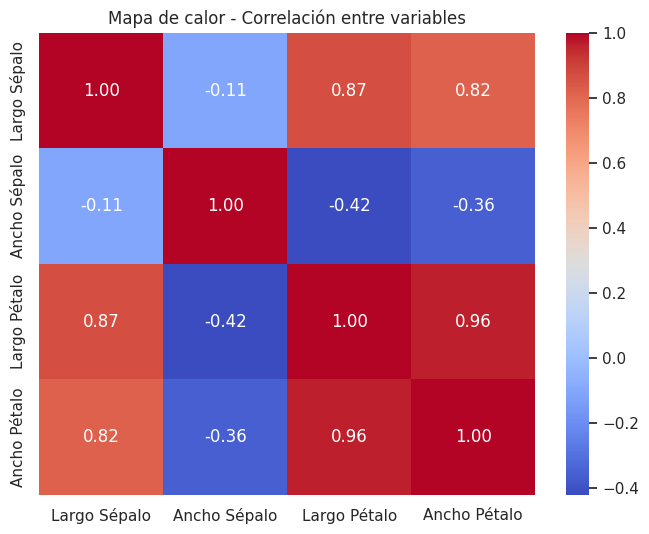


Conclusiones:
- Las especies muestran diferencias claras en largo y ancho del pétalo.
- El largo del pétalo es una de las variables más discriminantes.
- El análisis puede ser útil como base para modelos de clasificación en inteligencia artificial.



In [1]:
# Análisis del Dataset Iris con nombres de columnas en español

# Celda 1: Configuración Inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
print("Librerías importadas correctamente")

from google.colab import drive
drive.mount('/content/drive')

# Leer el archivo Iris.csv
iris = pd.read_csv("/content/drive/MyDrive/Datasets/Iris/Iris.csv")
print("Dataset cargado correctamente")


# Eliminar columna Id
iris.drop(columns="Id", inplace=True)

# Renombrar columnas a español
iris.columns = ["Largo Sépalo", "Ancho Sépalo", "Largo Pétalo", "Ancho Pétalo", "Especie"]
print("Dataset cargado y columnas renombradas")

# Celda 3: Exploración Inicial
iris.head()

# Celda 4: Estadísticas descriptivas
iris.describe()

# Celda 5: Conteo por especie
iris["Especie"].value_counts()

# Celda 6: Verificación de datos nulos y duplicados
print("Valores nulos por columna:")
print(iris.isnull().sum())

print("Cantidad de duplicados:", iris.duplicated().sum())

# Eliminamos duplicados si existen
iris = iris.drop_duplicates()

# Celda 7: Agrupación por especie y cálculo de promedios
iris.groupby("Especie").mean(numeric_only=True)

# Celda 8: Matriz de correlación
correlaciones = iris.corr(numeric_only=True)
correlaciones

# Celda 9: Visualización - Histogramas por especie
for columna in iris.columns[:-1]:
    plt.figure(figsize=(8,4))
    sns.histplot(data=iris, x=columna, hue="Especie", kde=True)
    plt.title(f"Distribución de {columna} por especie")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.legend(title="Especie")
    plt.show()

# Celda 10: Boxplots comparativos
plt.figure(figsize=(10,6))
iris_melted = iris.melt(id_vars="Especie", var_name="Característica", value_name="Valor")
sns.boxplot(data=iris_melted, x="Característica", y="Valor", hue="Especie")
plt.title("Comparación de características por especie")
plt.xticks(rotation=45)
plt.show()

# Celda 11: Scatter Matrix
from pandas.plotting import scatter_matrix
plt.figure()
scatter_matrix(iris.iloc[:, :-1], figsize=(10,10), diagonal='kde', c=iris["Especie"].astype('category').cat.codes, cmap="viridis")
plt.suptitle("Relaciones multivariables entre características")
plt.show()

# Celda 12: Mapa de calor de correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor - Correlación entre variables")
plt.show()

# Celda 13: Conclusiones
print("""
Conclusiones:
- Las especies muestran diferencias claras en largo y ancho del pétalo.
- El largo del pétalo es una de las variables más discriminantes.
- El análisis puede ser útil como base para modelos de clasificación en inteligencia artificial.
""")